# lab3 实验报告

姓名:李广泓 学号:16369031 学院:资讯管理学院 专业: 信息管理与信息系统

# 实验目的

* 搭建python数据分析的开发平台,并进行数据分析的基本操作

# 实验环境

* windows 10 64位
* anaconda
* jupyter notebook

# 实验步骤

## 数据导入

In [1]:
import pandas as pd
import scipy.stats as ss
df = pd.read_csv('data.csv')

## 格式转换

In [2]:
df.head() # data in first 5 lines

,Abra,Apayao,Benguet,Ifugao,Kalinga
0,1243,2934,148,3300,10553
1,4158,9235,4287,8063,35257
2,1787,1922,1955,1074,4544
3,17152,14501,3536,19607,31687
4,1266,2385,2530,3315,8520


In [3]:
df.tail() # data in last 5 lines

,Abra,Apayao,Benguet,Ifugao,Kalinga
74,2505,20878,3519,19737,16513
75,60303,40065,7062,19422,61808
76,6311,6756,3561,15910,23349
77,13345,38902,2583,11096,68663
78,2623,18264,3745,16787,16900


In [4]:
df.columns # show column name

Index(['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga'], dtype='object')

In [5]:
df.index # show index or row name

RangeIndex(start=0, stop=79, step=1)

In [6]:
df.T # transpose

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
Abra,1243,4158,1787,17152,1266,5576,927,21540,1039,5424,...,12763,2470,59094,6209,13316,2505,60303,6311,13345,2623
Apayao,2934,9235,1922,14501,2385,7452,1099,17038,1382,10588,...,37625,19532,35126,6335,38613,20878,40065,6756,38902,18264
Benguet,148,4287,1955,3536,2530,771,2796,2463,2592,1064,...,2354,4045,5987,3530,2585,3519,7062,3561,2583,3745
Ifugao,3300,8063,1074,19607,3315,13134,5134,14226,6842,13828,...,9838,17125,18940,15560,7746,19737,19422,15910,11096,16787
Kalinga,10553,35257,4544,31687,8520,28252,3106,36238,4973,40140,...,65782,15279,52437,24385,66148,16513,61808,23349,68663,16900


In [7]:
df.ix[:, 0].head() # select first column and print first 5 lines

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0     1243
1     4158
2     1787
3    17152
4     1266
Name: Abra, dtype: int64

In [8]:
df.iloc[:, 0].head() # .ix() is deprecated, using .iloc()

0     1243
1     4158
2     1787
3    17152
4     1266
Name: Abra, dtype: int64

In [9]:
df.iloc[10:20, 0:3] # select row10-row20, column1-column3

,Abra,Apayao,Benguet
10,981,1311,2560
11,27366,15093,3039
12,1100,1701,2382
13,7212,11001,1088
14,1048,1427,2847
15,25679,15661,2942
16,1055,2191,2119
17,5437,6461,734
18,1029,1183,2302
19,23710,12222,2598


In [10]:
# select by column name
df.iloc[10: 20, df.columns.get_indexer(['Abra', 'Apayao', 'Benguet'])]

,Abra,Apayao,Benguet
10,981,1311,2560
11,27366,15093,3039
12,1100,1701,2382
13,7212,11001,1088
14,1048,1427,2847
15,25679,15661,2942
16,1055,2191,2119
17,5437,6461,734
18,1029,1183,2302
19,23710,12222,2598


In [11]:
# drop the second and third columns
df.drop(df.columns[[1, 2]], axis=1).head()

,Abra,Ifugao,Kalinga
0,1243,3300,10553
1,4158,8063,35257
2,1787,1074,4544
3,17152,19607,31687
4,1266,3315,8520


## 描述统计

In [12]:
df.describe() # using .describe() to describe the dataset

,Abra,Apayao,Benguet,Ifugao,Kalinga
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,12874.379747,16860.645570,3237.392405,12414.620253,30446.417722
std,16746.466945,15448.153794,1588.536429,5034.282019,22245.707692
min,927.000000,401.000000,148.000000,1074.000000,2346.000000
25%,1524.000000,3435.500000,2328.000000,8205.000000,8601.500000
50%,5790.000000,10588.000000,3202.000000,13044.000000,24494.000000
75%,13330.500000,33289.000000,3918.500000,16099.500000,52510.500000
max,60303.000000,54625.000000,8813.000000,21031.000000,68663.000000


## 假设检验

In [13]:
# One-sample t test on 'Abra'
ss.ttest_1samp(a=df.iloc[:, df.columns.get_loc('Abra')], popmean=15000)

Ttest_1sampResult(statistic=-1.1281738488299586, pvalue=0.26270472069109496)

In [14]:
# One-sample t test on every column
ss.ttest_1samp(a=df, popmean=15000)

Ttest_1sampResult(statistic=array([ -1.12817385,   1.07053437, -65.81425599,  -4.564575  ,
         6.17156198]), pvalue=array([2.62704721e-01, 2.87680340e-01, 4.15643528e-70, 1.83764399e-05,
       2.82461897e-08]))

## 可视化

In [15]:
# draw boxplot by matplotlib
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.show()

<Figure size 640x480 with 1 Axes>

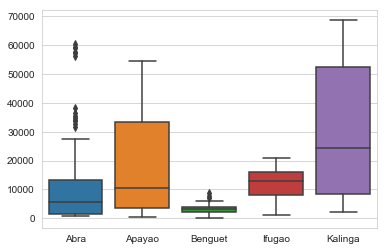

In [16]:
# draw boxplot by seaborn
import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(data=df)
plt.show()

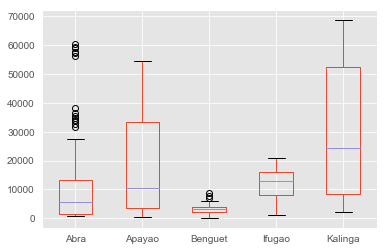

In [17]:
# modify the style
plt.style.use('ggplot')
df.plot(kind='box')
plt.show()

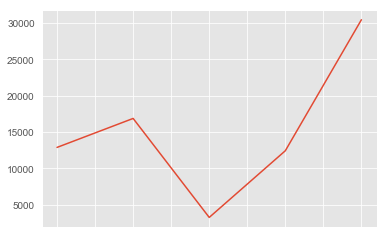

In [18]:
# draw a line chart
df.mean().plot(kind='line')
plt.show()

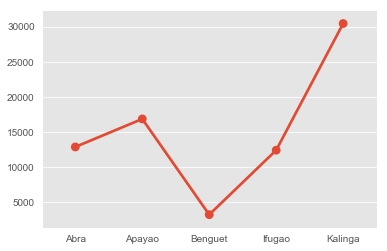

In [19]:
# draw a line chart by seaborn
sns.pointplot(x=df.columns, y=df.mean())
plt.show()

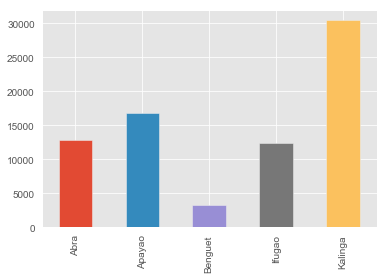

In [20]:
# histogram
df.mean().plot(kind='bar')
plt.show()

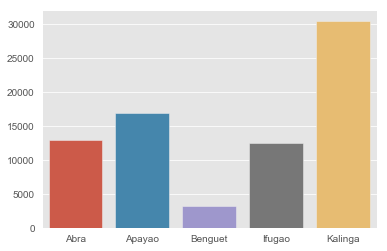

In [21]:
# histogram by seaborn
sns.barplot(x=df.columns, y=df.mean())
plt.show()

## 创建自定义函数

In [22]:
def add_2int(x, y):
    return x + y
add_2int(2, 2)

4

In [23]:
import numpy as np
def case2(n=10, mu=3, sigma=np.sqrt(5), p=0.025, rep=100):
    scaled_crit = ss.norm.ppf(q=1-p) * (sigma / np.sqrt(n))
    norm = np.random.normal(loc=mu, scale=sigma, size=(rep, n))
    xbar = norm.mean(1)
    low = xbar - scaled_crit
    up = xbar + scaled_crit
    rem = (mu > low) & (mu < up)
    m = np.c_[xbar, low, up, rem]
    inside = np.sum(m[:, 3])
    per = inside / rep
    desc = "There are " + str(inside) + " confidence intervals that contain the true mean, which is " + str(per) + " of the total CLs."
    print(desc)
case2()

There are 95.0 confidence intervals that contain the true mean, which is 0.95 of the total CLs.


In [24]:
# import
from sklearn.cluster import KMeans
from PIL import Image

In [25]:
im = np.array(Image.open('check.gif')) # img->vec
h, w = im.shape
X = [(h-x, y) for x in range(h) for y in range(w) if im[x][y] < 200] #以200为阈值读取图像中的颜色
X = np.array(X)

In [26]:
n_clusters = 4 #number of clusters
# init KMeans
k_means = KMeans(init='k-means++', n_clusters=n_clusters)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


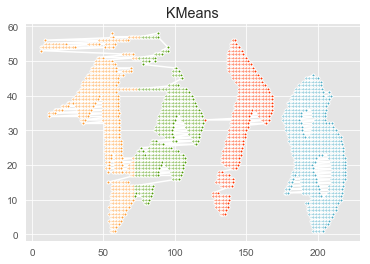

In [27]:
# result plot
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#FF3300']
plt.figure()
plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 0], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[1], cluster_center[0], markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('KMeans')
plt.grid(True)
plt.show()

# 实验感想

在本次实验中,我使用了anaconda提供的数据分析包进行了简单的数据分析,在实验进行过程中我深深地感受到了python语言以及包支持的强大.相关使用到的python包,如形成dataframe的pandas,又如进行矩阵操作的numpy都相当的重要.在今后加深对于这些包的学习我认为是很有必要的.